In [2]:
import pandas as pd

dataframe = pd.read_csv("/Users/anthonymunoz/ISTDTerm6/CDS/Computation Data Science/CDSLab3/CC-python-pandas-matplotlib-master/scottish_hills.csv")

In [3]:
print(dataframe.head(10))

                    Hill Name  Height   Latitude  Longitude    Osgrid
0       A' Bhuidheanach Bheag   936.0  56.870342  -4.199001  NN660775
1               A' Chailleach   997.0  57.693800  -5.128715  NH136714
2               A' Chailleach   929.2  57.109564  -4.179285  NH681041
3  A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
4             A' Ghlas-bheinn   918.0  57.255090  -5.303687  NH008231
5               A' Mhaighdean   967.0  57.719644  -5.346720  NH007749
6              A' Mharconaich   973.2  56.857002  -4.290668  NN604762
7                  Am Basteir   934.0  57.247931  -6.202982  NG465253
8                   Am Bodach  1031.8  56.741727  -4.983393  NN176650
9               Am Faochagach   953.0  57.771801  -4.853899  NH303793


In [4]:
sorted_hills = dataframe.sort_values(by = ['Height'],ascending = False)
print(sorted_hills.head(5))


                       Hill Name  Height   Latitude  Longitude    Osgrid
92                     Ben Nevis  1344.5  56.796891  -5.003675  NN166712
88   Ben Macdui (Beinn Macduibh)  1309.0  57.070368  -3.669099  NN988989
104                    Braeriach  1296.0  57.078298  -3.728389  NN953999
115                   Cairn Toul  1291.0  57.054397  -3.710773  NN963972
212        Sgor an Lochain Uaine  1258.0  57.058369  -3.725797  NN954976


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
x = dataframe.Height
y = dataframe.Latitude
z = dataframe.Longitude

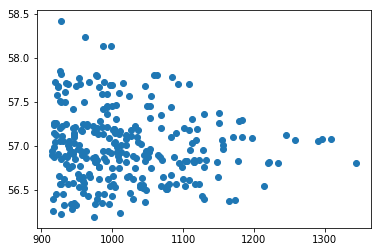

In [6]:
plt.scatter(x,y)

### Linear regression line

In [7]:
from scipy.stats import linregress
stats = linregress(x,y)
m = stats.slope
b = stats.intercept

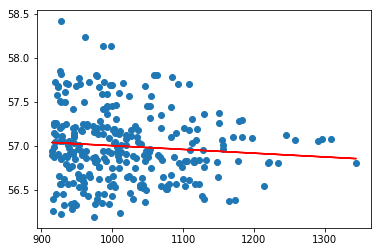

In [8]:
plt.scatter(x,y)
plt.plot(x,m*x + b, color = "red")

(array([56. , 56.5, 57. , 57.5, 58. , 58.5, 59. ]),
 <a list of 7 Text yticklabel objects>)

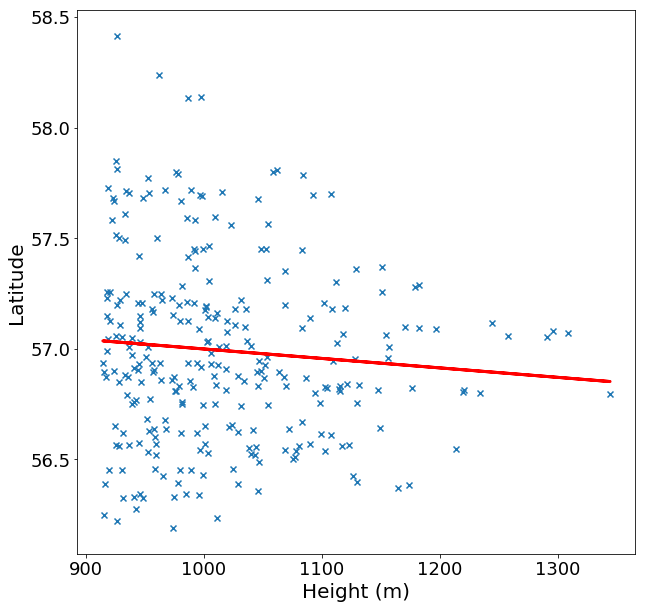

In [9]:
#Change default figure size
plt.figure(figsize=(10,10))

#Change default marker for the scatter from circle to x's
plt.scatter(x,y,marker='x')

#Set the linewidth on the regression line to 3px
plt.plot(x,m*x + b,color="red", linewidth = 3)

#Add x and y lables , and set their font sizes
plt.xlabel("Height (m)" , fontsize = 20)
plt.ylabel("Latitude" , fontsize = 20)

#Set the font size of the number labels on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

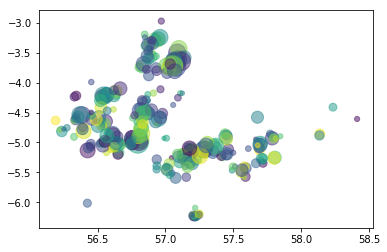

In [10]:
import numpy as np
colors = np.random.rand(len(y)) # generates a random color for each mountain
plt.scatter(y,z,s = (x-900),c = colors , alpha = 0.5)

### Histograms

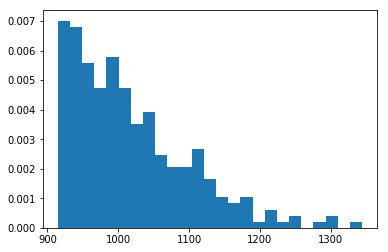

In [11]:
plt.hist(x,bins = 25,normed = True) # bins separates the latitude in 25 discrete categories.
plt.savefig("histogram.png",dpi=25) #results in 160x120 px image

Text(0.5,0,'Height')

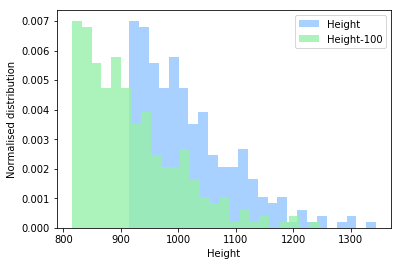

In [12]:
# using a stylesheet
plt.style.use("seaborn-pastel")

#creating new height variable
shifted_x = x-100

fig, ax = plt.subplots()

ax.hist(x,bins=25,normed = True,histtype = "stepfilled", alpha = 0.8,label = "Height")
ax.hist(shifted_x,bins = 25,normed = True, histtype="stepfilled", alpha = 0.8,label = "Height-100")
ax.legend(prop={'size':10})
ax.set_ylabel('Normalised distribution')
ax.set_xlabel('Height')




## Bar Charts

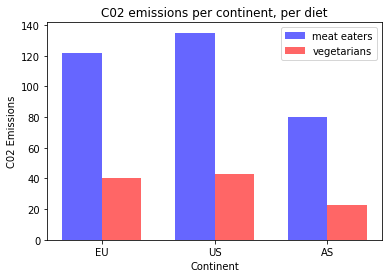

In [32]:
labels = ['EU','US','AS']

meateaters = [122,135,80]
vegetarians = [40,43,23]

# Keep a numeric index for x axis labels. This will be the pos of the ticks.
index = np.arange(len(labels))

fig,ax = plt.subplots()
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index,meateaters,bar_width,alpha = opacity,color = 'b',label = 'meat eaters')

#Note, shift x position with the bar width to put the next to the previous.
rects2 = ax.bar(index + bar_width,vegetarians,bar_width,alpha = opacity,color = 'r',label = 'vegetarians')

ax.set_xlabel('Continent')
ax.set_ylabel('C02 Emissions')
ax.set_title('C02 emissions per continent, per diet')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(labels)
ax.legend()

## Line Plots

In [14]:
def fahrenheit2celsius(temp):
    return (5./9.) * (temp-32)

In [15]:
temperature = [100,102,106,105,90,85,85,89,100,102,103,108,100,102,106,105,90,85]

Text(0.5,15,'Time (hour)')

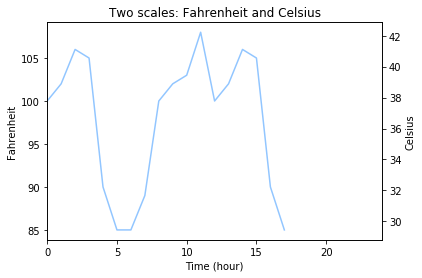

In [16]:
fig,ax_f = plt.subplots()
ax_c = ax_f.twinx()

#plot our data
ax_f.plot(temperature)
ax_f.set_xlim(0,24) # 24 hours

# set axis limits
y1,y2 = ax_f.get_ylim()
ax_c.set_ylim(fahrenheit2celsius(y1),fahrenheit2celsius(y2))
ax_c.figure.canvas.draw()

#change some axis labels
ax_f.set_title('Two scales: Fahrenheit and Celsius')
ax_f.set_ylabel('Fahrenheit')
ax_c.set_ylabel('Celsius')
ax_f.set_xlabel('Time (hour)')

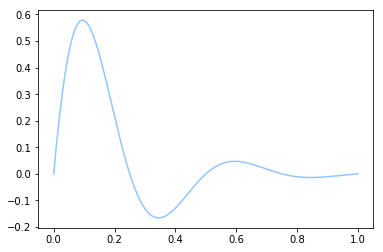

In [17]:
newx = np.linspace(0,1,500)
newy = np.sin(4*np.pi*newx) * np.exp(-5*newx)
fig,ax = plt.subplots() #plt.subplots() lets us access the axis and plot separately
ax.plot(newx,newy)

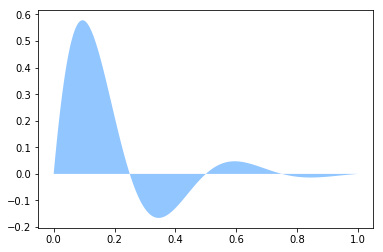

In [18]:
fig,ax = plt.subplots()
ax.fill(newx,newy)

Text(0,0.5,'Stock A price')

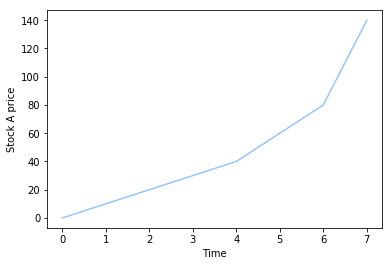

In [19]:
stockA = [0,10,20,30,40,60,80,140]
plt.plot(stockA)
plt.xlabel('Time')
plt.ylabel('Stock A price')


## Boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x1a1ba844a8>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1ba84eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1baf3b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1baf3748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1ba845f8>,
  <matplotlib.lines.Line2D at 0x1a1ba84a90>]}

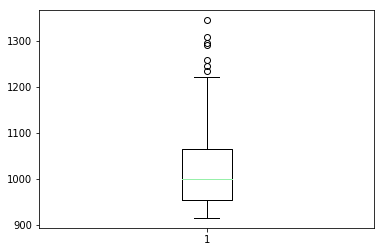

In [20]:
plt.boxplot(x)

{'boxes': [<matplotlib.lines.Line2D at 0x1a1bc87e80>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1bc928d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bc99588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bc99160>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1bc87fd0>,
  <matplotlib.lines.Line2D at 0x1a1bc924a8>]}

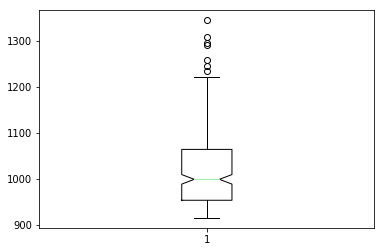

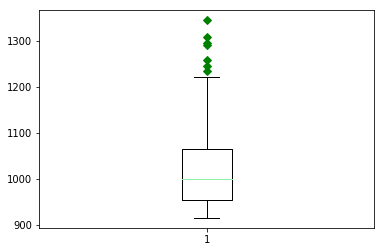

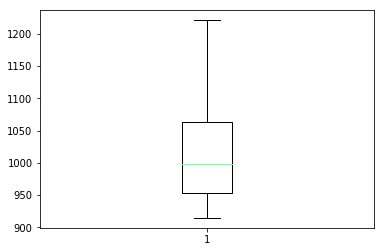

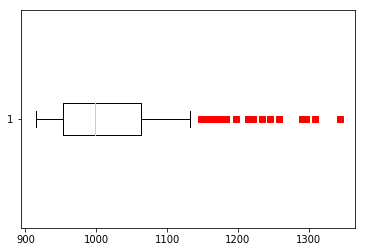

In [21]:
#notched plot
plt.figure()
plt.boxplot(x,1)

#change outlier point symbols
plt.figure()
plt.boxplot(x,0,'gD')

#dont show outlier points
plt.figure()
plt.boxplot(x,0,'')

#horizontal boxes
plt.figure()
plt.boxplot(x,0,'rs',0,0.75)

# Assignment

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")
print(df.head(5))

w_salary = df.Women
school = df.School
m_salary = df.Men


      School  Women  Men  Gap
0        MIT     94  152   58
1   Stanford     96  151   55
2    Harvard    112  165   53
3     U.Penn     92  141   49
4  Princeton     90  137   47
0            MIT
1       Stanford
2        Harvard
3         U.Penn
4      Princeton
5        Chicago
6     Georgetown
7          Tufts
8           Yale
9       Columbia
10          Duke
11     Dartmouth
12           NYU
13    Notre Dame
14       Cornell
15      Michigan
16         Brown
17      Berkeley
18         Emory
19          UCLA
20         SoCal
Name: School, dtype: object


## Histogram

Text(0.5,0,'Salaries')

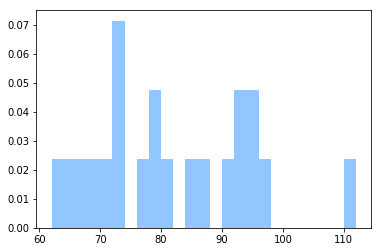

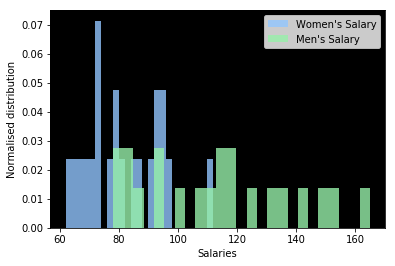

In [23]:
plt.hist(w_salary,bins = 25,normed = True) # bins separates the latitude in 25 discrete categories.
plt.savefig("histogramAssigment.png",dpi=25) #results in 160x120 px image

# using a stylesheet
plt.style.use("seaborn-pastel")

fig, ax = plt.subplots()

ax.set_facecolor('black')
ax.hist(w_salary,bins=25,normed = True,histtype = "stepfilled", alpha = 0.8,label = "Women's Salary")
ax.hist(m_salary,bins = 25,normed = True, histtype="stepfilled", alpha = 0.8,label = "Men's Salary")
ax.legend(prop={'size':10})
ax.set_ylabel('Normalised distribution')
ax.set_xlabel('Salaries')


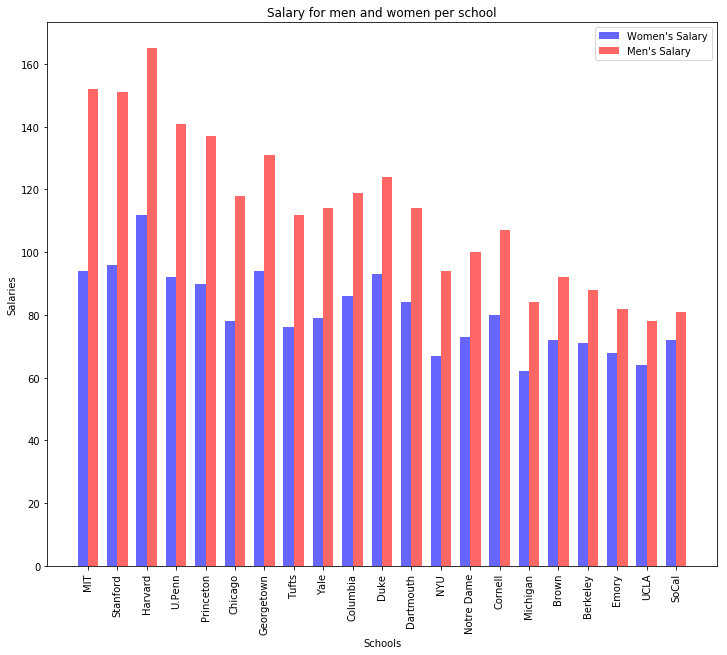

In [38]:
# Keep a numeric index for x axis labels. This will be the pos of the ticks.
index = np.arange(len(school))

fig,ax = plt.subplots(figsize = (12,10))
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index,w_salary,bar_width,alpha = opacity,color = 'b',label = "Women's Salary")

#Note, shift x position with the bar width to put the next to the previous.
rects2 = ax.bar(index + bar_width,m_salary,bar_width,alpha = opacity,color = 'r',label = "Men's Salary")

ax.set_xlabel('Schools')
ax.set_ylabel('Salaries')
ax.set_title('Salary for men and women per school')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(school, rotation='vertical')
ax.legend()

[Text(0,0,'Women'), Text(0,0,'Men')]

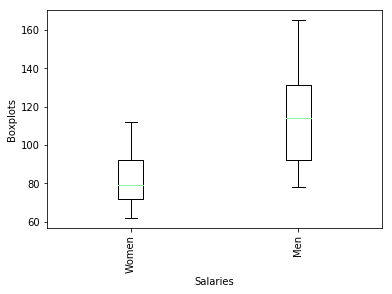

In [46]:
new_list = [w_salary, m_salary]


labels = ["Women" , "Men"]

fig,ax1 = plt.subplots() # This creates a canvas

ax1.boxplot(new_list)

ax1.set_xlabel('Salaries')
ax1.set_ylabel('Boxplots')
#ax1.set_xticks(index+bar_width/2)
ax1.set_xticklabels(labels, rotation='vertical')